In [1]:
from tensorflow.keras.datasets import reuters
#路透社数据集，它包含许多短新闻及其对应的主题，由路透社于1986年发布。它是一个简单且广泛使用的文本分类数据集，其中包括46个主题。某些主题的样本相对较多，但训练集中的每个主题都有至少10个样本。
(train_data, train_labels), (test_data,  test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


/Users/xun/app/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/xun/app/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [7]:
print(len(train_data),len(train_labels))

8982 8982


In [8]:
#用multi-hot编码对整数序列进行编码
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  #创建一个形状为(len(sequences), dimension)的零矩阵
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.  #将results[i]某些索引对应的值设为1
    return results

In [9]:
x_train = vectorize_sequences(train_data)  #将训练数据向量化
x_test = vectorize_sequences(test_data)  #将测试数据向量化

In [10]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels) #编码标签
y_test = to_categorical(test_labels)  #编码标签

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
#构建模型
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") #对于每个输入样本，神经网络都会输出一个46维向量。这个向量的每个元素（每个维度）代表不同的输出类别。
])

In [13]:
#编译模型
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", #sparse_categorical_crossentropy 稀疏分类交叉熵
              metrics=["accuracy"])

In [14]:
#训练、验证集
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [24]:
#训练模型
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=7,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/7
16/16 [==============================] - 1s 62ms/step - loss: 0.0914 - accuracy: 0.9599 - val_loss: 1.1837 - val_accuracy: 0.7970
Epoch 2/7
16/16 [==============================] - 1s 36ms/step - loss: 0.0924 - accuracy: 0.9589 - val_loss: 1.1755 - val_accuracy: 0.8040
Epoch 3/7
16/16 [==============================] - 0s 30ms/step - loss: 0.0919 - accuracy: 0.9599 - val_loss: 1.2886 - val_accuracy: 0.7770
Epoch 4/7
16/16 [==============================] - 1s 31ms/step - loss: 0.0925 - accuracy: 0.9592 - val_loss: 1.1596 - val_accuracy: 0.8010
Epoch 5/7
16/16 [==============================] - 0s 29ms/step - loss: 0.0945 - accuracy: 0.9582 - val_loss: 1.2767 - val_accuracy: 0.7820
Epoch 6/7
16/16 [==============================] - 0s 29ms/step - loss: 0.0909 - accuracy: 0.9585 - val_loss: 1.2409 - val_accuracy: 0.7870
Epoch 7/7
16/16 [==============================] - 0s 27ms/step - loss: 0.0873 - accuracy: 0.9600 - val_loss: 1.2460 - val_accuracy: 0.7910


In [25]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.4702 - accuracy: 0.7814


[1.470201015472412, 0.7813891172409058]

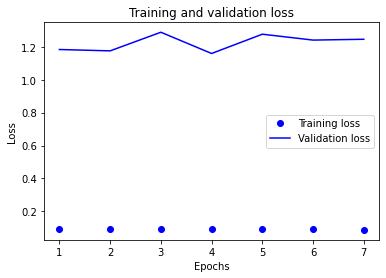

In [26]:
#绘制训练损失和验证损失
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")  # "bo"表示“蓝色圆点”
plt.plot(epochs, val_loss_values, "b", label="Validation loss")  # "b"表示“蓝色实线”
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

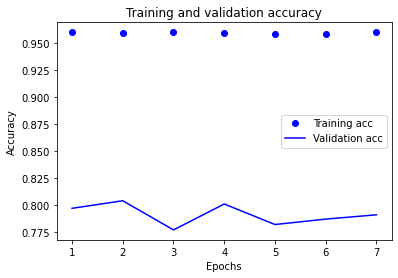

In [27]:
plt.clf()  #清空图像
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
#模型预测
predictions = model.predict(x_test)

In [31]:
#每个元素都是长度为46的向量
predictions[0].shape

(46,)

In [32]:
#所有向量元素总和为1
np.sum(predictions[0])

0.9999998

In [34]:
#概率最高的类别
np.argmax(predictions[0])

3